In [ ]:
import os
import sys
import tables
import numpy as np


filepath = '/mnt/stage/recon'
data = []
Run = []
data_column = np.zeros((0,0))
for dir in os.walk(filepath):
    if((dir[0]==filepath) & (dir[2] == [])):
        for i in range(len(dir[1])):
            E_total = []
            taud_total = []
            x_total = []
            y_total = []
            z_total = []

            dir_new = filepath + '/' + dir[1][i]
            
            for j in os.walk(dir_new):
                if(len(j[2])>0):
                    try:
                        h = tables.open_file(os.path.join(j[0],'tau.h5'))
                        recondata = h.root.Recon
                        E = recondata[:]['l0_sph']
                        E_total = np.hstack((E_total, E))
                        taud = recondata[:]['tau_d']
                        taud_total = np.hstack((taud_total, taud))
                        x = recondata[:]['x_sph']
                        x_total = np.hstack((x_total, x))
                        y = recondata[:]['y_sph']
                        y_total = np.hstack((y_total, y))
                        z = recondata[:]['z_sph']
                        z_total = np.hstack((z_total, z))
                        h.close()
                    except:
                        pass
                
            a = [E_total, taud_total, x_total, y_total, z_total]
            data.append(a)
            Run.append(dir[1][i])

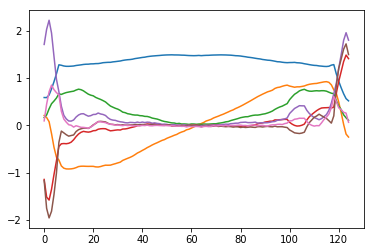

In [12]:
import h5py
filename = '/home/douwei/Recon-1ton/calib/logs/c1.8.h5'
h = h5py.File('./calib/coeff/c1.8.h5','r')
coeff = h['coeff'][...]
plt.plot(coeff)
plt.show()

(131, 7, 6)
./calib/logs/c0.8.h5
./calib/logs/c1.0.h5
./calib/logs/c1.2.h5
./calib/logs/c1.5.h5
./calib/logs/c1.8.h5
./calib/logs/c2.0.h5
1.8


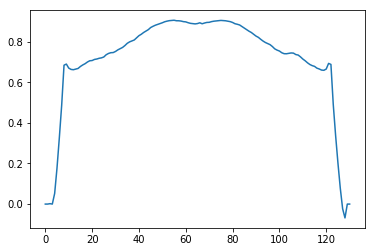

[-6.50000000e-01 -6.40000000e-01 -6.30000000e-01 -6.20000000e-01
 -6.10000000e-01 -6.00000000e-01 -5.90000000e-01 -5.80000000e-01
 -5.70000000e-01 -5.60000000e-01 -5.50000000e-01 -5.40000000e-01
 -5.30000000e-01 -5.20000000e-01 -5.10000000e-01 -5.00000000e-01
 -4.90000000e-01 -4.80000000e-01 -4.70000000e-01 -4.60000000e-01
 -4.50000000e-01 -4.40000000e-01 -4.30000000e-01 -4.20000000e-01
 -4.10000000e-01 -4.00000000e-01 -3.90000000e-01 -3.80000000e-01
 -3.70000000e-01 -3.60000000e-01 -3.50000000e-01 -3.40000000e-01
 -3.30000000e-01 -3.20000000e-01 -3.10000000e-01 -3.00000000e-01
 -2.90000000e-01 -2.80000000e-01 -2.70000000e-01 -2.60000000e-01
 -2.50000000e-01 -2.40000000e-01 -2.30000000e-01 -2.20000000e-01
 -2.10000000e-01 -2.00000000e-01 -1.90000000e-01 -1.80000000e-01
 -1.70000000e-01 -1.60000000e-01 -1.50000000e-01 -1.40000000e-01
 -1.30000000e-01 -1.20000000e-01 -1.10000000e-01 -1.00000000e-01
 -9.00000000e-02 -8.00000000e-02 -7.00000000e-02 -6.00000000e-02
 -5.00000000e-02 -4.00000

In [88]:
import Readlog
logs, radius, coeff = Readlog.coeff3d()
print(logs[-2])
plt.plot(coeff[:,0,-2])
coeff_corr = coeff[:,0,-2]
plt.show()
print(radius)

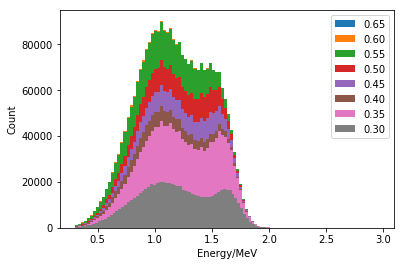

In [180]:
r = np.sqrt(data[0][2]**2+data[0][3]**2+data[0][4]**2)
E = data[0][0]
import matplotlib.pyplot as plt
plt.figure(1)
for i in np.arange(0.7,0.3,-0.05):
    plt.hist(data[0][0][(r<i) & (E>0.3) & (E<3)],bins=100)
plt.legend(["0.65","0.60","0.55","0.50","0.45","0.40","0.35","0.30"])
plt.xlabel('Energy/MeV')
plt.ylabel('Count')
plt.show()

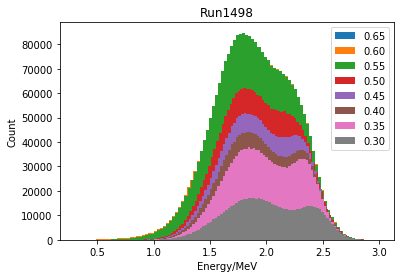

In [96]:
run_No = 0
r = np.sqrt(data[run_No][2]**2+data[run_No][3]**2+data[run_No][4]**2)
r[r>=0.65]=0.65
E = data[run_No][0]

from scipy.interpolate import interp1d
xx = radius
f = interp1d(xx[:], coeff_corr, kind='cubic')
E_interp = f(r)
E = E + E_interp

import matplotlib.pyplot as plt
plt.figure(1)
for i in np.arange(0.7,0.3,-0.05):
    plt.hist(E[(r<i) & (E>0.3) & (E<3)],bins=100)
plt.legend(["0.65","0.60","0.55","0.50","0.45","0.40","0.35","0.30"])
plt.xlabel('Energy/MeV')
plt.ylabel('Count')
plt.title('Run'+Run[run_No])
plt.show()

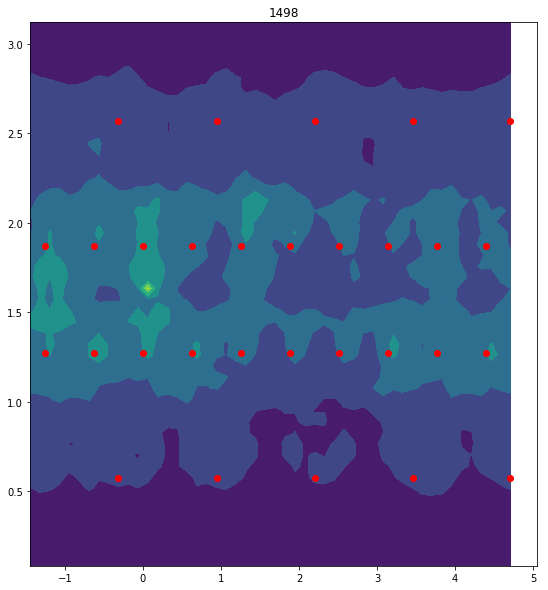

In [110]:
run_No = 0
x1 = data[run_No][2]
y1 = data[run_No][3]
z1 = data[run_No][4]

r1 = np.sqrt(x1**2 + y1**2 + z1**2)

theta1 = np.arccos(z1/(r1+1e-4))

phi1 = np.arctan(y1/(x1+1e-4)) + (x1>0)*np.pi


def ReadPMT():
    f = open(r"./PMT1t.txt")
    line = f.readline()
    data_list = [] 
    while line:
        num = list(map(float,line.split()))
        data_list.append(num)
        line = f.readline()
    f.close()
    PMT_pos = np.array(data_list)
    return PMT_pos
PMT_pos = ReadPMT()

%matplotlib inline
fig = plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
H1, xedges, yedges = np.histogram2d(phi1, theta1, bins=50)
X, Y = np.meshgrid(xedges[1:],yedges[1:])
plt.contourf(X,Y,np.transpose(H1))
plt.scatter(np.arctan(PMT_pos[:,1]/(PMT_pos[:,0]+1e-3)) + (PMT_pos[:,0]>=0)*np.pi, \
            np.arccos(PMT_pos[:,2]/np.sqrt(np.sum(PMT_pos**2,axis=1))),\
           c='red')
plt.title(Run[run_No])
plt.show()

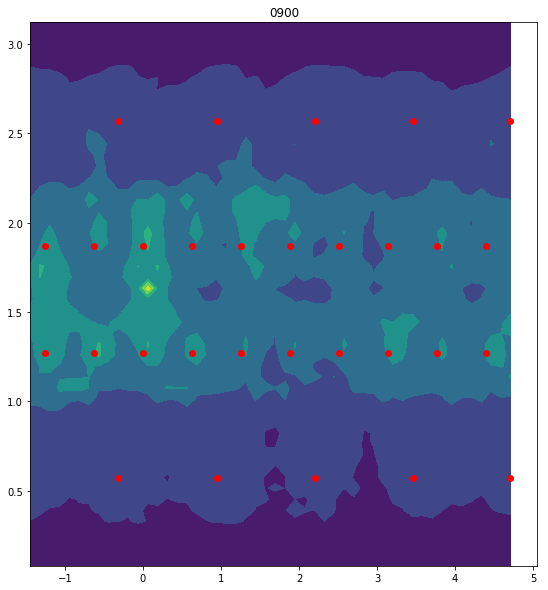

In [111]:
run_No = 1
x1 = data[run_No][2]
y1 = data[run_No][3]
z1 = data[run_No][4]

r1 = np.sqrt(x1**2 + y1**2 + z1**2)

theta1 = np.arccos(z1/(r1+1e-4))

phi1 = np.arctan(y1/(x1+1e-4)) + (x1>0)*np.pi


def ReadPMT():
    f = open(r"./PMT1t.txt")
    line = f.readline()
    data_list = [] 
    while line:
        num = list(map(float,line.split()))
        data_list.append(num)
        line = f.readline()
    f.close()
    PMT_pos = np.array(data_list)
    return PMT_pos
PMT_pos = ReadPMT()

%matplotlib inline
fig = plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
H1, xedges, yedges = np.histogram2d(phi1, theta1, bins=50)
X, Y = np.meshgrid(xedges[1:],yedges[1:])
plt.contourf(X,Y,np.transpose(H1))
plt.scatter(np.arctan(PMT_pos[:,1]/(PMT_pos[:,0]+1e-3)) + (PMT_pos[:,0]>=0)*np.pi, \
            np.arccos(PMT_pos[:,2]/np.sqrt(np.sum(PMT_pos**2,axis=1))),\
           c='red')
plt.title(Run[run_No])
plt.show()

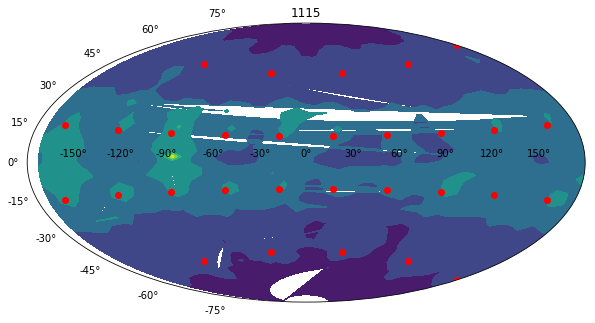

In [174]:
run_No = 5
x1 = data[run_No][2]
y1 = data[run_No][3]
z1 = data[run_No][4]

r1 = np.sqrt(x1**2 + y1**2 + z1**2)

theta1 = np.arccos(z1/(r1+1e-4))

phi1 = np.arctan(y1/(x1+1e-4)) + (x1>0)*np.pi


def ReadPMT():
    f = open(r"./PMT1t.txt")
    line = f.readline()
    data_list = [] 
    while line:
        num = list(map(float,line.split()))
        data_list.append(num)
        line = f.readline()
    f.close()
    PMT_pos = np.array(data_list)
    return PMT_pos
PMT_pos = ReadPMT()

%matplotlib inline
fig = plt.figure(figsize = (10,10))
plt.subplot(111,projection="aitoff")
H1, xedges, yedges = np.histogram2d((phi1-np.pi/2), (theta1-np.pi/2), bins=50)

X, Y = np.meshgrid(xedges[1:],yedges[1:])
plt.contourf(X,Y,np.transpose(H1))
#print(np.min(theta1-np.pi/2),np.max(theta1-np.pi/2))
#print(np.min(phi1-np.pi/2),np.max(phi1-np.pi/2))
plt.scatter(np.arctan(PMT_pos[:,1]/(PMT_pos[:,0]+1e-3)) + (PMT_pos[:,0]>=0)*np.pi -1* np.pi/2, \
            np.arccos(PMT_pos[:,2]/np.sqrt(np.sum(PMT_pos**2,axis=1))) - np.pi/2,\
           c='red')

#print(np.min(np.arctan(PMT_pos[:,1]/(PMT_pos[:,0]+1e-3)) + (PMT_pos[:,0]>=0)*np.pi -1* np.pi/2),np.max(np.arctan(PMT_pos[:,1]/(PMT_pos[:,0]+1e-3)) + (PMT_pos[:,0]>=0)*np.pi -1* np.pi/2))
#print(np.min(np.arccos(PMT_pos[:,2]/np.sqrt(np.sum(PMT_pos**2,axis=1))) - np.pi/2),np.max(np.arccos(PMT_pos[:,2]/np.sqrt(np.sum(PMT_pos**2,axis=1))) - np.pi/2))
plt.title(Run[run_No])
plt.show()

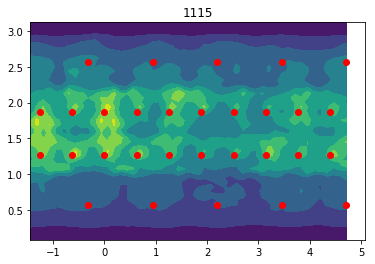

In [140]:
fig = plt.figure()
H1, xedges, yedges = np.histogram2d(phi1[r1>0.01], theta1[r1>0.01], bins=50)
X, Y = np.meshgrid(xedges[1:],yedges[1:])
plt.contourf(X,Y,np.transpose(H1))
plt.scatter(np.arctan(PMT_pos[:,1]/(PMT_pos[:,0]+1e-3)) + (PMT_pos[:,0]>=0)*np.pi, \
            np.arccos(PMT_pos[:,2]/np.sqrt(np.sum(PMT_pos**2,axis=1))),\
           c='red')
plt.title(Run[run_No])
plt.show()




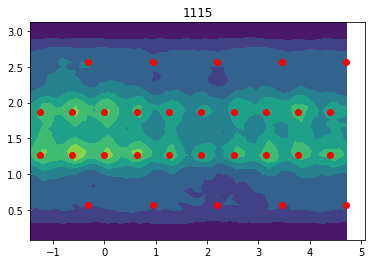

In [141]:
fig = plt.figure()
H1, xedges, yedges = np.histogram2d(phi1[(r1<0.4)&(r1>0.35)], theta1[(r1<0.4)&(r1>0.35)], bins=50)
X, Y = np.meshgrid(xedges[1:],yedges[1:])
plt.contourf(X,Y,np.transpose(H1))
plt.scatter(np.arctan(PMT_pos[:,1]/(PMT_pos[:,0]+1e-3)) + (PMT_pos[:,0]>=0)*np.pi, \
            np.arccos(PMT_pos[:,2]/np.sqrt(np.sum(PMT_pos**2,axis=1))),\
           c='red')
plt.title(Run[run_No])
plt.show()

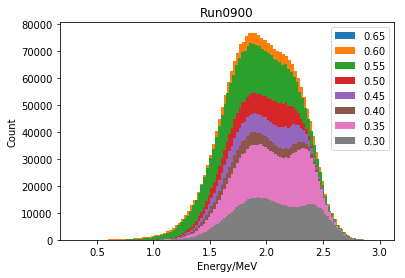

In [97]:
run_No = 1
r = np.sqrt(data[run_No][2]**2+data[run_No][3]**2+data[run_No][4]**2)
r[r>=0.65]=0.65
E = data[run_No][0]

from scipy.interpolate import interp1d
xx = radius
f = interp1d(xx[:], coeff_corr, kind='cubic')
E_interp = f(r)
E = E + E_interp

import matplotlib.pyplot as plt
plt.figure(1)
for i in np.arange(0.7,0.3,-0.05):
    plt.hist(E[(r<i) & (E>0.3) & (E<3)],bins=100)
plt.legend(["0.65","0.60","0.55","0.50","0.45","0.40","0.35","0.30"])
plt.xlabel('Energy/MeV')
plt.ylabel('Count')
plt.title('Run'+Run[run_No])
plt.show()

/home/orv/gentoo/usr/lib64/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater_equal
  This is separate from the ipykernel package so we can avoid doing imports until
/home/orv/gentoo/usr/lib64/python3.6/site-packages/scipy/interpolate/interpolate.py:688: RuntimeWarning: invalid value encountered in less
  below_bounds = x_new < self.x[0]
/home/orv/gentoo/usr/lib64/python3.6/site-packages/scipy/interpolate/interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]
/home/orv/gentoo/usr/lib64/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in less
  from ipykernel import kernelapp as app
/home/orv/gentoo/usr/lib64/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in greater
  from ipykernel import kernelapp as app


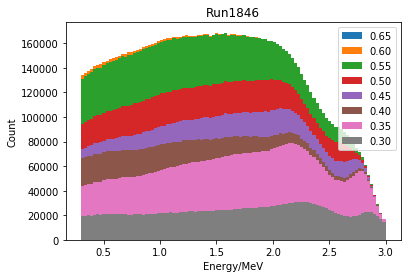

In [98]:
run_No = 2
r = np.sqrt(data[run_No][2]**2+data[run_No][3]**2+data[run_No][4]**2)
r[r>=0.65]=0.65
E = data[run_No][0]

from scipy.interpolate import interp1d
xx = radius
f = interp1d(xx[:], coeff_corr, kind='cubic')
E_interp = f(r)
E = E + E_interp

import matplotlib.pyplot as plt
plt.figure(1)
for i in np.arange(0.7,0.3,-0.05):
    plt.hist(E[(r<i) & (E>0.3) & (E<3)],bins=100)
plt.legend(["0.65","0.60","0.55","0.50","0.45","0.40","0.35","0.30"])
plt.xlabel('Energy/MeV')
plt.ylabel('Count')
plt.title('Run'+Run[run_No])
plt.show()

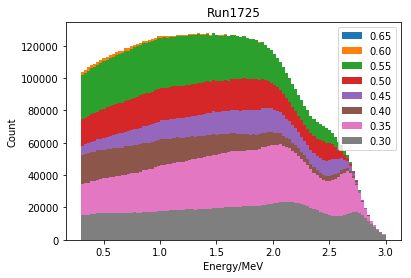

In [99]:
run_No = 4
r = np.sqrt(data[run_No][2]**2+data[run_No][3]**2+data[run_No][4]**2)
r[r>=0.65]=0.65
E = data[run_No][0]

from scipy.interpolate import interp1d
xx = radius
f = interp1d(xx[:], coeff_corr, kind='cubic')
E_interp = f(r)
E = E + E_interp

import matplotlib.pyplot as plt
plt.figure(1)
for i in np.arange(0.7,0.3,-0.05):
    plt.hist(E[(r<i) & (E>0.3) & (E<3)],bins=100)
plt.legend(["0.65","0.60","0.55","0.50","0.45","0.40","0.35","0.30"])
plt.xlabel('Energy/MeV')
plt.ylabel('Count')
plt.title('Run'+Run[run_No])
plt.show()

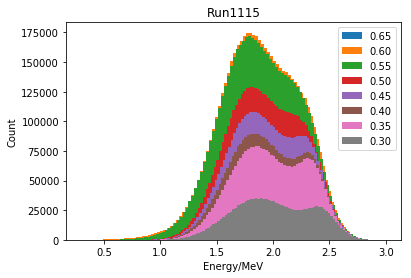

In [100]:
run_No = 5
r = np.sqrt(data[run_No][2]**2+data[run_No][3]**2+data[run_No][4]**2)
r[r>=0.65]=0.65
E = data[run_No][0]

from scipy.interpolate import interp1d
xx = radius
f = interp1d(xx[:], coeff_corr, kind='cubic')
E_interp = f(r)
E = E + E_interp

import matplotlib.pyplot as plt
plt.figure(1)
for i in np.arange(0.7,0.3,-0.05):
    plt.hist(E[(r<i) & (E>0.3) & (E<3)],bins=100)
plt.legend(["0.65","0.60","0.55","0.50","0.45","0.40","0.35","0.30"])
plt.xlabel('Energy/MeV')
plt.ylabel('Count')
plt.title('Run'+Run[run_No])
plt.show()

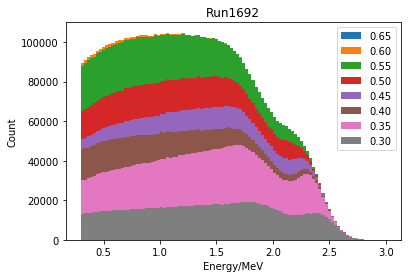

In [101]:
run_No = 3
r = np.sqrt(data[run_No][2]**2+data[run_No][3]**2+data[run_No][4]**2)
r[r>=0.65]=0.65
E = data[run_No][0]

from scipy.interpolate import interp1d
xx = radius
f = interp1d(xx[:], coeff_corr, kind='cubic')
E_interp = f(r)
E = E + E_interp

import matplotlib.pyplot as plt
plt.figure(1)
for i in np.arange(0.7,0.3,-0.05):
    plt.hist(E[(r<i) & (E>0.3) & (E<3)],bins=100)
plt.legend(["0.65","0.60","0.55","0.50","0.45","0.40","0.35","0.30"])
plt.xlabel('Energy/MeV')
plt.ylabel('Count')
plt.title('Run'+Run[run_No])
plt.show()

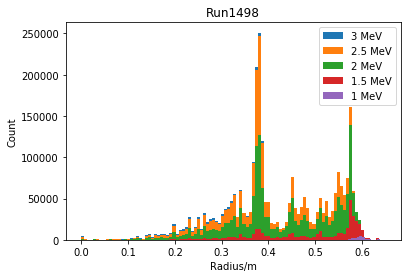

In [116]:
run_No = 0
r = np.sqrt(data[run_No][2]**2+data[run_No][3]**2+data[run_No][4]**2)
r[r>=0.65]=0.65
E = data[run_No][0]

from scipy.interpolate import interp1d
xx = radius
f = interp1d(xx[:], coeff_corr, kind='cubic')
E_interp = f(r)
E = E + E_interp

import matplotlib.pyplot as plt
plt.figure(1)
for i in np.arange(3,0.5,-0.5):
    plt.hist(r[(E<i)],bins=100)
plt.legend(["3 MeV","2.5 MeV","2 MeV","1.5 MeV","1 MeV","0.5 MeV"])
plt.xlabel('Radius/m')
plt.ylabel('Count')
plt.title('Run'+Run[run_No])
plt.show()

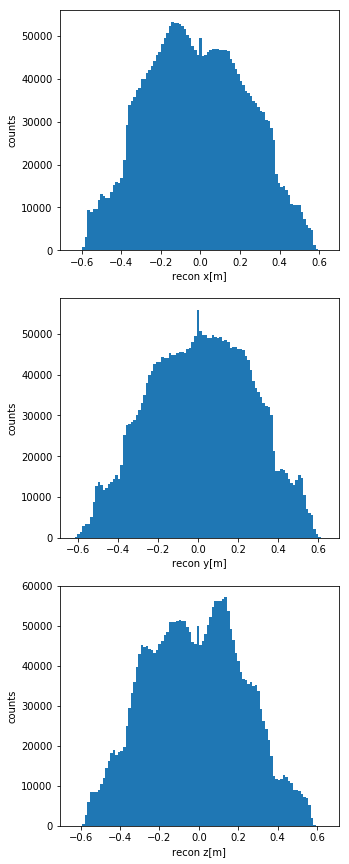

In [127]:
run_No = 0
r = np.sqrt(data[run_No][2]**2+data[run_No][3]**2+data[run_No][4]**2)
plt.figure(figsize=(5,15))
plt.subplot(3,1,1)
plt.hist(data[run_No][2],bins=100)
plt.xlabel('recon x[m]')
plt.ylabel('counts')
plt.subplot(3,1,2)
plt.hist(data[run_No][3],bins=100)
plt.xlabel('recon y[m]')
plt.ylabel('counts')
plt.subplot(3,1,3)
plt.hist(data[run_No][4],bins=100)
plt.xlabel('recon z[m]')
plt.ylabel('counts')
plt.show()
plt.hist(data[run])

0 False


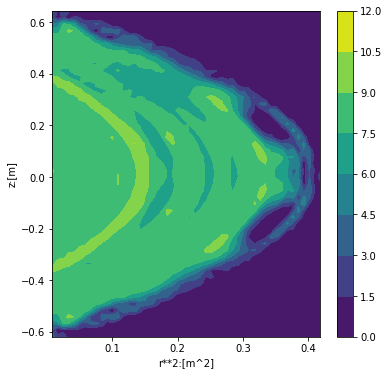

In [176]:
plt.figure(figsize = (6,6))

r1 = data[run_No][2]**2 + data[run_No][3]**2
z_new = data[run_No][4]

print(np.sum(r1>0.7),np.sum(z_new)>0.7)
H1, xedges, yedges = np.histogram2d(r1, z_new, bins=50)
X, Y = np.meshgrid(xedges[1:],yedges[1:])
plt.contourf(X,Y,np.log(np.transpose(H1)+1))
plt.xlabel('r**2:[m^2]')
plt.ylabel('z:[m]')
plt.colorbar()
plt.show()